In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# An Introduction to Bayesian Statistical Analysis

Though many of you will have taken a statistics course or two during your undergraduate (or graduate education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all, except perhaps to derive Bayes' formula as a trivial rearrangement of the definition of conditional probability. Even today, Bayesian courses are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely different paradigm for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of *probability statements*

![prob model](http://d.pr/i/1b8bt+)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

## Bayesian vs Frequentist Statistics: What's the difference?

Any statistical paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about (1).
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.


### The Frequentist World View

![Fisher](http://d.pr/i/1hHuq+)

- The data that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model parameters are considered **fixed**. The parameters' values are unknown, but they are fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on particular values of \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes \\(n\\) sampled children, \\(y\\) of them having been diagnosed with autism. A frequentist estimator of the prevalence \\(p\\) is:

> <div style="font-size:25px">
> \\[\hat{p} = \frac{y}{n}\\]
> </div>

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](http://d.pr/i/18NIg+)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/IPython notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

<div style="font-size:35px">
\\[p(\theta | y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

## Bayesian Inference, in 3 Easy Steps

![123](http://d.pr/i/khl+)

Gelman et al. (2013) describe the process of conducting Bayesian statistical analysis in 3 steps.

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?


## Probability

> *Misunderstanding of probability may be the greatest of all impediments to scientific literacy.*
> — Stephen Jay Gould

Because of its reliance on probabilty models, its worth talking a little bit about probability. There are three different ways to define probability, depending on how it is being used.

### 1. Classical probability

<div style="font-size:25px">
\\[Pr(X=x) = \frac{\text{# x outcomes}}{\text{# possible outcomes}}\\]
</div>

Classical probability is an assessment of **possible** outcomes of elementary events. Elementary events are assumed to be equally likely.

### 2. Frequentist probability

<div style="font-size:25px">
\\[Pr(X=x) = \lim_{n \rightarrow \infty} \frac{\text{# times x has occurred}}{\text{# independent and identical trials}}\\]
</div>

Unlike classical probability, frequentist probability is an EMPIRICAL definition. It is an objective statement desribing events that have occurred.

### 3. Subjective probability

<div style="font-size:25px">
\\[Pr(X=x)\\]
</div>

Subjective probability is a measure of one's uncertainty in the value of \\(X\\). It characterizes the state of knowledge regarding some unknown quantity using probability.

It is not associated with long-term frequencies nor with equal-probability events.

For example:

- X = the true prevalence of diabetes in Austin is < 15%
- X = the blood type of the person sitting next to you is type A
- X = the Nashville Predators will win next year's Stanley Cup
- X = it is raining in Nashville


## Bayes' Formula

Now that we have some probability under our belt, we turn to Bayes' formula. This, as you recall, is the engine that allows us to obtain estimates of unknown quantities that we care about, using information retained by the data we observe. It turns out to be quite simple to derive Bayes' formula directly from the definition of conditional probability.

Again, the goal in Bayesian inference is to calculate the **posterior distribution** of our unknowns:

<div style="font-size: 150%;">  
\\[Pr(\theta|Y=y)\\]
</div>

This expression is a **conditional probability**. It is the probability of \\(\theta\\) *given* the observed values of \\(Y=y\\).

In general, the conditional probability of A given B is defined as follows:

\\[Pr(B|A) = \frac{Pr(A \cap B)}{Pr(A)}\\]

To gain an intuition for this, it is helpful to use a Venn diagram:

![conditional probability](http://d.pr/i/DG40+)

Notice from this diagram that the following conditional probability is also true:

\\[Pr(A|B) = \frac{Pr(A \cap B)}{Pr(B)}\\]

These can both be rearranged to be expressions of the joint probability of A and B. Setting these equal to one another:

\\[Pr(B|A)Pr(A) = Pr(A|B)Pr(B)\\]

Then rearranging:

\\[Pr(B|A) = \frac{Pr(A|B)Pr(B)}{Pr(A)}\\]

This is Bayes' formula. Replacing the generic A and B with things we care about reveals why Bayes' formula is so important:

![bayes formula](http://d.pr/i/1dxfq+)

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\), as expressed by the posterior distribution the posterior distribution.

The innocuous denominator \\(P(y)\\) cannot be calculated directly, and is actually the expression in the numerator, integrated over all \\(\theta\\):

<div style="font-size: 150%;">  
\\[Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}\\]
</div>

The intractability of this integral is one of the factors that has contributed to the under-utilization of Bayesian methods by statisticians.

### Priors

Once considered a controversial aspect of Bayesian analysis, the prior distribution characterizes what is known about an unknown quantity before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood functions

The likelihood represents the information in the observed data, and is used to update prior distributions to posterior distributions. This updating of belief is justified becuase of the **likelihood principle**, which states:

> Following observation of \\(y\\), the likelihood \\(L(\theta|y)\\) contains all experimental information from \\(y\\) about the unknown \\(\theta\\).

Bayesian analysis satisfies the likelihood principle because the posterior distribution's dependence on the data is only through the likelihood. In comparison, most frequentist inference procedures violate the likelihood principle, because inference will depend on the design of the trial or experiment.

What is a likelihood function? It is closely related to the probability density (or mass) function. Taking a common example, consider some data that are binomially distributed (that is, they describe the outcomes of \\(n\\) binary events). Here is the binomial sampling distribution:

\\[p(Y|\theta) = {n \choose y} \theta^{y} (1-\theta)^{n-y}\\]

We can code this easily in Python:

In [8]:
from scipy.misc import comb

pbinom = lambda y, n, p: comb(n, y) * p**y * (1-p)**(n-y)

This function returns the probability of observing \\(y\\) events from \\(n\\) trials, where events occur independently with probability \\(p\\).

In [9]:
pbinom(3, 10, 0.5)

0.1171875

In [10]:
pbinom(1, 25, 0.5)

7.4505805969238281e-07

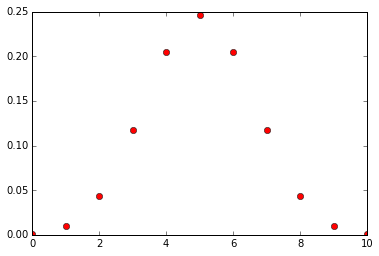

In [11]:
yvals = range(10+1)
plt.plot(yvals, [pbinom(y, 10, 0.5) for y in yvals], 'ro')

What about the likelihood function? 

The likelihood function is the exact same form as the sampling distribution, except that we are now interested in varying the parameter for a given dataset.

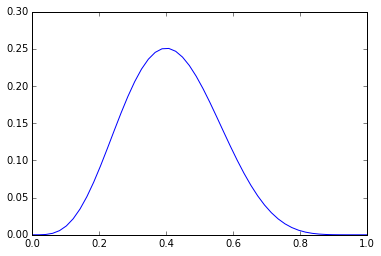

In [12]:
pvals = np.linspace(0, 1)
y = 4
plt.plot(pvals, [pbinom(y, 10, p) for p in pvals])

So, though we are dealing with the same equation, these are entirely different functions; the distribution is discrete, while the likelihood is continuous; the distribtion's range is from 0 to 10, while the likelihood's is 0 to 1; the distribution integrates (sums) to one, while the likelhood does not.